<a href="https://colab.research.google.com/github/Sumanta1706/Genes/blob/main/HDV_Gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('gene.xlsx')
dataset

,Genotype,HDV_fitness
0,AATCGGCCTCACAG,0.020744
1,CGTCGGCTCCGCAG,0.000000
2,AGTCGTCTTTGGCG,0.025124
3,AAGGCTCTCTACAC,0.031116
4,CAGGCGGCTTACAC,0.021991
...,...,...
16379,AGGGCGCTCTGGAG,0.000000
16380,AGGCGTGTTTGCAG,0.027620
16381,AGGCGTGCTTGCCC,0.029845
16382,AGTCCTGTTCGGCG,0.000000


**Spliting the Genotype column into 14 unique columns**

In [ ]:
split_column = dataset['Genotype'].apply(lambda x: pd.Series(list(x)))

In [ ]:
split_column

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,A,A,T,C,G,G,C,C,T,C,A,C,A,G
1,C,G,T,C,G,G,C,T,C,C,G,C,A,G
2,A,G,T,C,G,T,C,T,T,T,G,G,C,G
3,A,A,G,G,C,T,C,T,C,T,A,C,A,C
4,C,A,G,G,C,G,G,C,T,T,A,C,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,A,G,G,G,C,G,C,T,C,T,G,G,A,G
16380,A,G,G,C,G,T,G,T,T,T,G,C,A,G
16381,A,G,G,C,G,T,G,C,T,T,G,C,C,C
16382,A,G,T,C,C,T,G,T,T,C,G,G,C,G


In [ ]:
dataset = pd.concat([dataset, split_column], axis = 1)

In [ ]:
dataset = dataset.drop(['Genotype'], axis = 1)

In [ ]:
dataset

,HDV_fitness,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.020744,A,A,T,C,G,G,C,C,T,C,A,C,A,G
1,0.000000,C,G,T,C,G,G,C,T,C,C,G,C,A,G
2,0.025124,A,G,T,C,G,T,C,T,T,T,G,G,C,G
3,0.031116,A,A,G,G,C,T,C,T,C,T,A,C,A,C
4,0.021991,C,A,G,G,C,G,G,C,T,T,A,C,A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.000000,A,G,G,G,C,G,C,T,C,T,G,G,A,G
16380,0.027620,A,G,G,C,G,T,G,T,T,T,G,C,A,G
16381,0.029845,A,G,G,C,G,T,G,C,T,T,G,C,C,C
16382,0.000000,A,G,T,C,C,T,G,T,T,C,G,G,C,G


**Creating dummy for categorical data**

In [ ]:
categ = dataset.select_dtypes(include='object')
num = dataset.select_dtypes(include = np.number)
cat_dummies = pd.get_dummies(categ, drop_first=True)

In [ ]:
data = pd.concat([num, cat_dummies], axis=1)

In [ ]:
data

,HDV_fitness,0_C,1_G,2_T,3_G,4_G,5_T,6_G,7_T,8_T,9_T,10_G,11_G,12_C,13_G
0,0.020744,0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,0.000000,1,1,1,0,1,0,0,1,0,0,1,0,0,1
2,0.025124,0,1,1,0,1,1,0,1,1,1,1,1,1,1
3,0.031116,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,0.021991,1,0,0,1,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.000000,0,1,0,1,0,0,0,1,0,1,1,1,0,1
16380,0.027620,0,1,0,0,1,1,1,1,1,1,1,0,0,1
16381,0.029845,0,1,0,0,1,1,1,0,1,1,1,0,1,0
16382,0.000000,0,1,1,0,0,1,1,1,1,0,1,1,1,1


**dividing the dataset into dependant and indepent**

In [ ]:
X = data.iloc[:, 1:15].values
y = data.iloc[:, 0].values

In [ ]:
print(X)
print(y)

[[0 0 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 1]]
[0.02074382 0.         0.02512375 ... 0.02984529 0.         0.        ]


**Spliting the dataset into training set and testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

###Training the random forest regression model into the training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,scoring='r2',
                            verbose=0)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.predict(X_test)
print('Best R2: ', rf_reg_tuned.best_score_)

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,scoring = 'neg_mean_squared_error',
                            verbose=0)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.predict(X_test)
print('MSE: ', rf_reg_tuned.best_score_)

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,scoring='neg_mean_absolute_error',
                            verbose=0)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.predict(X_test)
print('Best MAE: ', rf_reg_tuned.best_score_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best R2:  0.5408985405605353
MSE:  -0.00169022629911229
Best MAE:  -0.02013902093314188


In [ ]:
print(rf_reg_tuned.best_params_)

{'max_depth': 10, 'max_features': 8, 'n_estimators': 100}


**Importing the libraries for Keras sequential regression model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Defining the keras sequential regression model

For our model 

In [ ]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(9, input_dim=dim, activation="relu"))
  #model.add(Dense(4, activation="relu"))
	model.add(Dense(4, activation="relu"))
  
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model

In [ ]:
model = create_mlp(X.shape[1], regress=True)
#opt = Adam(lr=1e-3, decay=1e-3 / 200)
#model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# train the model
print("[INFO] training model...")
history = model.fit(x=X, y=y 
	, validation_split=0.2,
	epochs=100, batch_size=8)
predict = model.predict(X_test, batch_size=8, verbose=0, steps=None, 
                        callbacks=None, max_queue_size=10, workers = 1, 
												            use_multiprocessing=False)

[INFO] training model...
Epoch 1/100
1639/1639 [==============================] - 4s 2ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0611 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0245
Epoch 2/100
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0251 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0258
Epoch 3/100
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0245 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0239
Epoch 4/100
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0240 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0218
Epoch 5/100
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0238 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0221
Epoch 6/100
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0238 - val_loss: 0.0031 - val_mse

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 135       
                                                                 
 dense_4 (Dense)             (None, 4)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________
None


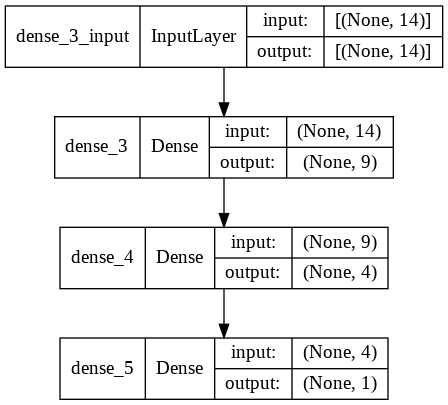

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes=True)

In [ ]:
import sklearn
sklearn.metrics.r2_score(y_test, predict)

0.6129942951402142

In [ ]:
import sklearn
sklearn.metrics.mean_absolute_error(y_test, predict)

0.018141815983792903

In [ ]:
import sklearn
sklearn.metrics.mean_squared_error(y_test, predict)

0.001101189174190841

**Plotting the models for keras sequential using mean average error**

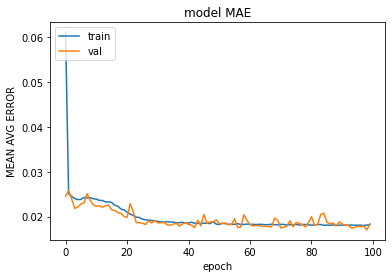

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MEAN AVG ERROR')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Plotting the models for keras sequential using mean squared error**

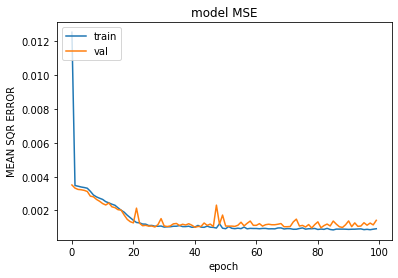

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MEAN SQR ERROR')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()